<a href="https://colab.research.google.com/github/tjoseph786/Principle-Component-Analysis/blob/master/PCA_on_cleaned_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Loading fresh data

In [ ]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.decomposition import PCA 
from sklearn.preprocessing import StandardScaler
%matplotlib inline

In [ ]:
df = pd.read_csv('/content/All_CHF_Dataframe.csv')

In [ ]:
df.head()

,Unnamed: 0,pulse,respiration,systolic.blood.pressure,diastolic.blood.pressure,map,weight,height,BMI,type.of.heart.failure,NYHA.cardiac.function.classification,Killip.grade,myocardial.infarction,congestive.heart.failure,peripheral.vascular.disease,cerebrovascular.disease,dementia,Chronic.obstructive.pulmonary.disease,connective.tissue.disease,peptic.ulcer.disease,diabetes,moderate.to.severe.chronic.kidney.disease,hemiplegia,leukemia,liver.disease,AIDS,CCI.score,type.II.respiratory.failure,fio2,acute.renal.failure,LVEF,left.ventricular.end.diastolic.diameter.LV,brain.natriuretic.peptide
0,500,80,18,164,85,111.333333,60.0,1.68,21.258503,3,4,3,0,1,0,0,0,0,0,0.0,0,1.0,0,0,0.0,0,2.0,0,40,0,20.0,75.0,3827.40
1,501,80,21,140,60,86.666667,48.0,1.50,21.333333,3,4,2,0,1,1,0,0,0,0,0.0,0,0.0,0,0,0.0,0,2.0,0,33,0,64.0,44.0,451.00
2,503,78,20,166,98,120.666667,77.0,1.55,32.049948,3,4,1,0,1,0,0,0,0,0,0.0,1,1.0,0,0,0.0,0,3.0,0,33,0,52.0,39.0,857.46
3,505,81,19,156,70,98.666667,35.0,1.42,17.357667,3,3,3,0,1,0,0,0,0,0,0.0,1,1.0,0,0,0.0,0,3.0,1,33,0,63.0,41.0,1720.67
4,506,80,19,110,60,76.666667,50.0,1.60,19.531250,3,4,2,0,1,0,0,0,0,0,0.0,0,0.0,0,0,0.0,0,1.0,0,33,0,66.0,48.0,876.28


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 587 entries, 0 to 586
Data columns (total 33 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Unnamed: 0                                  587 non-null    int64  
 1   pulse                                       587 non-null    int64  
 2   respiration                                 587 non-null    int64  
 3   systolic.blood.pressure                     587 non-null    int64  
 4   diastolic.blood.pressure                    587 non-null    int64  
 5   map                                         587 non-null    float64
 6   weight                                      587 non-null    float64
 7   height                                      587 non-null    float64
 8   BMI                                         587 non-null    float64
 9   type.of.heart.failure                       587 non-null    int64  
 10  NYHA.cardiac.f

In [ ]:
df_lvef = df
df_lvef['LVEF'].clip(40,41,inplace = True)         #Classifying the LVEF in two categories

In [ ]:
df_lvef['LVEF'].replace(to_replace=40,value=int(0),inplace=True)
df_lvef['LVEF'].replace(to_replace=41,value=int(1),inplace=True)

In [ ]:
Y = df_lvef['LVEF'].to_numpy()
X = pd.DataFrame(df_lvef.drop(columns = ['liver.disease','AIDS','hemiplegia','leukemia','LVEF','dementia','type.of.heart.failure','weight','height','congestive.heart.failure','peptic.ulcer.disease'])).to_numpy()

In [ ]:
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split

In [ ]:
Y

array([0., 1., 1., 1., 1., 0., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 0., 1., 0., 1., 1., 0., 1., 1., 1., 1.,
       1., 1., 1., 1., 0., 0., 1., 0., 0., 1., 1., 1., 1., 0., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 0., 0., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1.,
       0., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0.,
       1., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 0., 0., 1., 0., 1.,
       1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 0., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       0., 1., 1., 1., 0., 0., 1., 0., 0., 1., 0., 0., 1., 0., 1., 1., 1.,
       1., 1., 1., 1., 0., 0., 0., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1.,
       1., 1., 1., 1., 0.

In [ ]:
X

array([[ 500.  ,   80.  ,   18.  , ...,    0.  ,   75.  , 3827.4 ],
       [ 501.  ,   80.  ,   21.  , ...,    0.  ,   44.  ,  451.  ],
       [ 503.  ,   78.  ,   20.  , ...,    0.  ,   39.  ,  857.46],
       ...,
       [1996.  ,   85.  ,   20.  , ...,    0.  ,   56.  , 2174.08],
       [2001.  ,  100.  ,   22.  , ...,    0.  ,   46.  ,  531.07],
       [2002.  ,  100.  ,   19.  , ...,    0.  ,   51.  , 2290.6 ]])

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler=StandardScaler()
scaler.fit(X)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [ ]:
scaled_data=scaler.transform(X)

In [ ]:
scaled_data

array([[-1.37367607, -0.26819721, -0.65981277, ...,  0.        ,
         2.02000873,  1.9353597 ],
       [-1.37139421, -0.26819721,  1.1195598 , ...,  0.        ,
        -0.84150126, -0.60169215],
       [-1.3668305 , -0.36221439,  0.52643561, ...,  0.        ,
        -1.30303513, -0.29627511],
       ...,
       [ 2.03997741, -0.03315427,  0.52643561, ...,  0.        ,
         0.26618003,  0.69304286],
       [ 2.05138668,  0.67197455,  1.71268399, ...,  0.        ,
        -0.65688771, -0.54152697],
       [ 2.05366854,  0.67197455, -0.06668858, ...,  0.        ,
        -0.19535384,  0.78059685]])

In [ ]:
pca=PCA(n_components=10)

In [ ]:
pca.fit(scaled_data)

PCA(copy=True, iterated_power='auto', n_components=10, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [ ]:
x_pca=pca.transform(scaled_data)

In [ ]:
scaled_data.shape

(587, 22)

In [ ]:
x_pca.shape

(587, 10)

In [ ]:
scaled_data

array([[-1.37367607, -0.26819721, -0.65981277, ...,  0.        ,
         2.02000873,  1.9353597 ],
       [-1.37139421, -0.26819721,  1.1195598 , ...,  0.        ,
        -0.84150126, -0.60169215],
       [-1.3668305 , -0.36221439,  0.52643561, ...,  0.        ,
        -1.30303513, -0.29627511],
       ...,
       [ 2.03997741, -0.03315427,  0.52643561, ...,  0.        ,
         0.26618003,  0.69304286],
       [ 2.05138668,  0.67197455,  1.71268399, ...,  0.        ,
        -0.65688771, -0.54152697],
       [ 2.05366854,  0.67197455, -0.06668858, ...,  0.        ,
        -0.19535384,  0.78059685]])

In [ ]:
x_pca

array([[ 0.85461432,  1.96938987,  1.87532812, ..., -0.67309386,
         0.28548431, -0.92780022],
       [-0.29851603,  0.23505012, -0.51020073, ..., -2.75889182,
         1.83922918, -0.26449964],
       [ 3.07863813,  0.76149721, -1.65657095, ...,  0.33501136,
        -0.25633126,  0.45991111],
       ...,
       [-2.22813075,  1.31756381, -3.25885908, ...,  1.81222299,
         0.47865431, -0.28682519],
       [-0.30877378, -0.66498225,  0.31575311, ...,  1.24769716,
        -0.35706035, -0.55544753],
       [ 1.14034157, -0.76403153,  0.62616509, ...,  0.58211273,
        -0.25411274, -1.24254108]])

In [ ]:
pca = PCA(n_components=11) 

In [ ]:
principalComponents = pca.fit_transform(scaled_data) 
principalDf = pd.DataFrame(data = principalComponents , columns = ['principal component 1', 'principal component 2', 'principal component 3', 'principal component 4', 'principal component 5', 'principal component 6', 'principal component 7', 'principal component 8', 'principal component 9', 'principal component 10', 'principal component 11'])

#principalDf =  11 pca

In [ ]:
principalDf.head(5) # prints the top 5 rows

,principal component 1,principal component 2,principal component 3,principal component 4,principal component 5,principal component 6,principal component 7,principal component 8,principal component 9,principal component 10,principal component 11
0,0.854614,1.969390,1.875328,-2.086394,-0.897176,-0.102411,2.159508,-0.673094,0.285484,-0.927800,-0.210439
1,-0.298516,0.235050,-0.510201,1.391119,-0.685964,-1.123168,-0.661280,-2.758892,1.839229,-0.264500,1.648929
2,3.078638,0.761497,-1.656571,-0.993384,-1.891366,2.045309,0.541368,0.335011,-0.256331,0.459911,0.260511
3,0.453815,1.908074,-0.703945,2.302706,-2.495556,0.838159,2.064699,-0.347785,-0.632114,-0.055184,1.106446
4,-1.979416,-0.640785,1.055068,0.400676,-0.996482,-0.663600,0.127239,-0.564725,0.143183,1.034252,0.701693


#Test on pca 11

In [ ]:
Y = Y.astype(int)
Y = Y.reshape(-1)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(principalDf,Y,test_size = 0.148)

In [ ]:
scaler = preprocessing.StandardScaler().fit(x_train)
x_train = scaler.transform(x_train)
scaler = preprocessing.StandardScaler().fit(x_test)
x_test = scaler.transform(x_test)

###RandomizedSearchCV

In [ ]:
from sklearn.model_selection import RandomizedSearchCV# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 500, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 3,5]
# Minimum number of samples required at each leaf node
min_samples_leaf = [ 2, 3, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [ ]:
clf = RandomForestClassifier()
rf_rscv = RandomizedSearchCV(estimator=clf,param_distributions = random_grid,n_iter = 100,cv = 5)
rf_rscv.fit(x_train,y_train)

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [ ]:
rf_rscv.best_params_

{'bootstrap': True,
 'max_depth': 90,
 'max_features': 'auto',
 'min_samples_leaf': 4,
 'min_samples_split': 5,
 'n_estimators': 833}

###Grid search cv

In [ ]:
from sklearn.model_selection import GridSearchCV# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [50, 60,70,80],
    'max_features': ['auto','sqrt'],
    'min_samples_leaf': [2,3,4],
    'min_samples_split': [2,3,4],
    'n_estimators': [900,1000,1333,1400]
}
rf = RandomForestClassifier()# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)
grid_search.fit(x_train,y_train)

Fitting 3 folds for each of 288 candidates, totalling 864 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:  4.4min
[Parallel(n_jobs=-1)]: Done 361 tasks      | elapsed: 10.0min
[Parallel(n_jobs=-1)]: Done 644 tasks      | elapsed: 17.8min
[Parallel(n_jobs=-1)]: Done 864 out of 864 | elapsed: 23.8min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [ ]:
grid_search.best_params_

{'bootstrap': True,
 'max_depth': 60,
 'max_features': 'sqrt',
 'min_samples_leaf': 4,
 'min_samples_split': 3,
 'n_estimators': 1000}

In [ ]:
clf = RandomForestClassifier(n_estimators=1333,bootstrap=True,max_depth=80, max_features='sqrt', min_samples_split= 4, min_samples_leaf=3).fit(x_train,y_train)
clf.fit(x_train,y_train)
y_predicted = clf.predict(x_test)
y_train_pred = clf.predict(x_train)

pred_prob = clf.predict_proba(x_test)
print("Accuracy Test %0.2f" %(accuracy_score(y_test,y_predicted)*100))
print("Accuracy Train %0.2f" %(accuracy_score(y_train,y_train_pred)*100))
print("ROC-AUC Score %0.2f" %(roc_auc_score(y_test,pred_prob[:,1])*100))
print("Recall Score %0.2f" %(recall_score(y_test,y_predicted)*100))

Accuracy Test 80.46
Accuracy Train 96.20
ROC-AUC Score 84.06
Recall Score 92.65


In [ ]:
from xgboost import XGBRFClassifier
xgb = XGBRFClassifier()
xgb.fit(x_train,y_train)
y_predicted = xgb.predict(x_test)
y_train_pred = xgb.predict(x_train)

pred_prob = xgb.predict_proba(x_test)
print("Accuracy Test %0.2f" %(accuracy_score(y_test,y_predicted)*100))
print("Accuracy Train %0.2f" %(accuracy_score(y_train,y_train_pred)*100))
print("ROC-AUC Score %0.2f" %(roc_auc_score(y_test,pred_prob[:,1])*100))
print("Recall Score %0.2f" %(recall_score(y_test,y_predicted)*100))

Accuracy Test 79.31
Accuracy Train 84.20
ROC-AUC Score 81.73
Recall Score 92.65


In [ ]:
from lightgbm import LGBMClassifier
lgb = LGBMClassifier()
lgb.fit(x_train,y_train)
y_predicted = lgb.predict(x_test)
y_train_pred = lgb.predict(x_train)

pred_prob = xgb.predict_proba(x_test)
print("Accuracy Test %0.2f" %(accuracy_score(y_test,y_predicted)*100))
print("Accuracy Train %0.2f" %(accuracy_score(y_train,y_train_pred)*100))
print("ROC-AUC Score %0.2f" %(roc_auc_score(y_test,pred_prob[:,1])*100))
print("Recall Score %0.2f" %(recall_score(y_test,y_predicted)*100))

Accuracy Test 80.46
Accuracy Train 100.00
ROC-AUC Score 81.73
Recall Score 91.18


In [ ]:
!pip install catboost

In [ ]:
from catboost import CatBoostClassifier
cgb = CatBoostClassifier(iterations=10000)
cgb.fit(x_train,y_train)
y_predicted = cgb.predict(x_test)
y_train_pred = cgb.predict(x_train)

In [ ]:
pred_prob = cgb.predict_proba(x_test)
print("Accuracy Test %0.2f" %(accuracy_score(y_test,y_predicted)*100))
print("Accuracy Train %0.2f" %(accuracy_score(y_train,y_train_pred)*100))
print("ROC-AUC Score %0.2f" %(roc_auc_score(y_test,pred_prob[:,1])*100))
print("Recall Score %0.2f" %(recall_score(y_test,y_predicted)*100))

Accuracy Test 82.76
Accuracy Train 100.00
ROC-AUC Score 82.24
Recall Score 92.54


In [ ]:
df_xtrain = pd.DataFrame(x_train)
df_xtrain.shape

(500, 11)

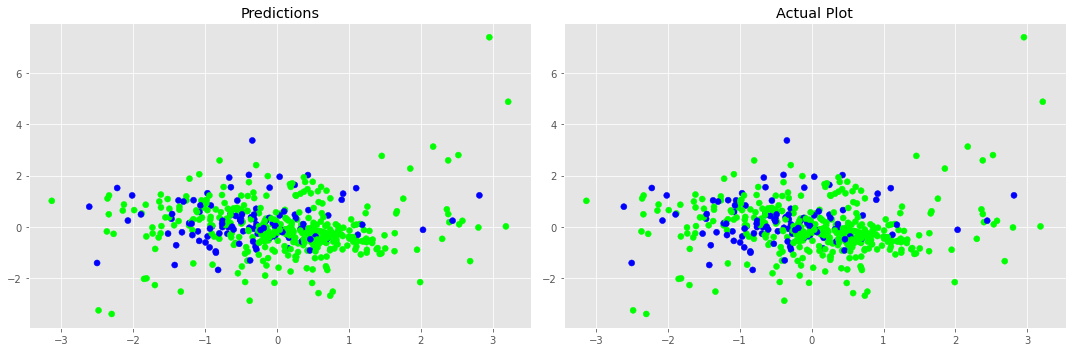

In [ ]:
plt.style.use('ggplot')
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
axes[0].scatter(df_xtrain.iloc[:,9],df_xtrain.iloc[:,4],c=y_train_pred,cmap='brg')
axes[1].scatter(df_xtrain.iloc[:,9],df_xtrain.iloc[:,4],c=y_train,cmap='brg')
axes[0].title.set_text("Predictions")
axes[1].title.set_text("Actual Plot")
fig.tight_layout()

#For pca 5

In [ ]:
pca = PCA(n_components=5) 

In [ ]:
principalComponents5 = pca.fit_transform(scaled_data) 
principalDf5 = pd.DataFrame(data = principalComponents5 , columns = ['principal component 1', 'principal component 2', 'principal component 3', 'principal component 4', 'principal component 5'])

In [ ]:
principalDf5.head()

,principal component 1,principal component 2,principal component 3,principal component 4,principal component 5
0,0.855290,1.966877,1.892570,-2.152110,-0.904092
1,-0.298996,0.235250,-0.505648,1.375011,-0.688857
2,3.077458,0.763055,-1.655082,-1.002427,-1.906995
3,0.453819,1.909382,-0.723430,2.353526,-2.460427
4,-1.979976,-0.639710,1.052060,0.409271,-1.000849


In [ ]:
Y = Y.astype(int)
Y = Y.reshape(-1)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(principalDf5,Y,test_size = 0.148)

In [ ]:
scaler = preprocessing.StandardScaler().fit(x_train)
x_train = scaler.transform(x_train)
scaler = preprocessing.StandardScaler().fit(x_test)
x_test = scaler.transform(x_test)

###Random search cv

In [ ]:
from sklearn.model_selection import RandomizedSearchCV# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 500, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 3,5]
# Minimum number of samples required at each leaf node
min_samples_leaf = [ 2, 3, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [ ]:
clf = RandomForestClassifier()
rf_rscv = RandomizedSearchCV(estimator=clf,param_distributions = random_grid,n_iter = 100,cv = 5)
rf_rscv.fit(x_train,y_train)

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [ ]:
rf_rscv.best_params_

{'bootstrap': True,
 'max_depth': 100,
 'max_features': 'auto',
 'min_samples_leaf': 4,
 'min_samples_split': 3,
 'n_estimators': 1000}

###Grid search cv

In [ ]:
from sklearn.model_selection import GridSearchCV# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [50, 60,70,80],
    'max_features': ['auto','sqrt'],
    'min_samples_leaf': [2,3,4],
    'min_samples_split': [2,3,4],
    'n_estimators': [900,1000,1333,1400]
}
rf = RandomForestClassifier()# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)
grid_search.fit(x_train,y_train)

Fitting 3 folds for each of 288 candidates, totalling 864 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   59.1s
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:  4.1min
[Parallel(n_jobs=-1)]: Done 361 tasks      | elapsed:  9.4min
[Parallel(n_jobs=-1)]: Done 644 tasks      | elapsed: 16.6min
[Parallel(n_jobs=-1)]: Done 864 out of 864 | elapsed: 22.3min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [ ]:
grid_search.best_params_

{'bootstrap': True,
 'max_depth': 80,
 'max_features': 'auto',
 'min_samples_leaf': 4,
 'min_samples_split': 4,
 'n_estimators': 900}

In [ ]:
clf = RandomForestClassifier(n_estimators=1333,bootstrap=True,max_depth=80, max_features='sqrt', min_samples_split= 4, min_samples_leaf=3).fit(x_train,y_train)
clf.fit(x_train,y_train)
y_predicted = clf.predict(x_test)
y_train_pred = clf.predict(x_train)

pred_prob = clf.predict_proba(x_test)
print("Accuracy Test %0.2f" %(accuracy_score(y_test,y_predicted)*100))
print("Accuracy Train %0.2f" %(accuracy_score(y_train,y_train_pred)*100))
print("ROC-AUC Score %0.2f" %(roc_auc_score(y_test,pred_prob[:,1])*100))
print("Recall Score %0.2f" %(recall_score(y_test,y_predicted)*100))

Accuracy Test 79.31
Accuracy Train 95.20
ROC-AUC Score 76.89
Recall Score 88.57


In [ ]:
from xgboost import XGBRFClassifier
xgb = XGBRFClassifier()
xgb.fit(x_train,y_train)
y_predicted = xgb.predict(x_test)
y_train_pred = xgb.predict(x_train)

pred_prob = xgb.predict_proba(x_test)
print("Accuracy Test %0.2f" %(accuracy_score(y_test,y_predicted)*100))
print("Accuracy Train %0.2f" %(accuracy_score(y_train,y_train_pred)*100))
print("ROC-AUC Score %0.2f" %(roc_auc_score(y_test,pred_prob[:,1])*100))
print("Recall Score %0.2f" %(recall_score(y_test,y_predicted)*100))

Accuracy Test 82.76
Accuracy Train 81.60
ROC-AUC Score 77.14
Recall Score 92.86


In [ ]:
from lightgbm import LGBMClassifier
lgb = LGBMClassifier()
lgb.fit(x_train,y_train)
y_predicted = lgb.predict(x_test)
y_train_pred = lgb.predict(x_train)

pred_prob = xgb.predict_proba(x_test)
print("Accuracy Test %0.2f" %(accuracy_score(y_test,y_predicted)*100))
print("Accuracy Train %0.2f" %(accuracy_score(y_train,y_train_pred)*100))
print("ROC-AUC Score %0.2f" %(roc_auc_score(y_test,pred_prob[:,1])*100))
print("Recall Score %0.2f" %(recall_score(y_test,y_predicted)*100))

Accuracy Test 73.56
Accuracy Train 100.00
ROC-AUC Score 77.14
Recall Score 82.86


In [ ]:
from catboost import CatBoostClassifier
cgb = CatBoostClassifier(iterations=10000)
cgb.fit(x_train,y_train)
y_predicted = cgb.predict(x_test)
y_train_pred = cgb.predict(x_train)

In [ ]:
pred_prob = cgb.predict_proba(x_test)
print("Accuracy Test %0.2f" %(accuracy_score(y_test,y_predicted)*100))
print("Accuracy Train %0.2f" %(accuracy_score(y_train,y_train_pred)*100))
print("ROC-AUC Score %0.2f" %(roc_auc_score(y_test,pred_prob[:,1])*100))
print("Recall Score %0.2f" %(recall_score(y_test,y_predicted)*100))

Accuracy Test 79.31
Accuracy Train 97.60
ROC-AUC Score 75.13
Recall Score 88.57


In [ ]:
df_xtrain = pd.DataFrame(x_train)
df_xtrain.shape

(500, 5)

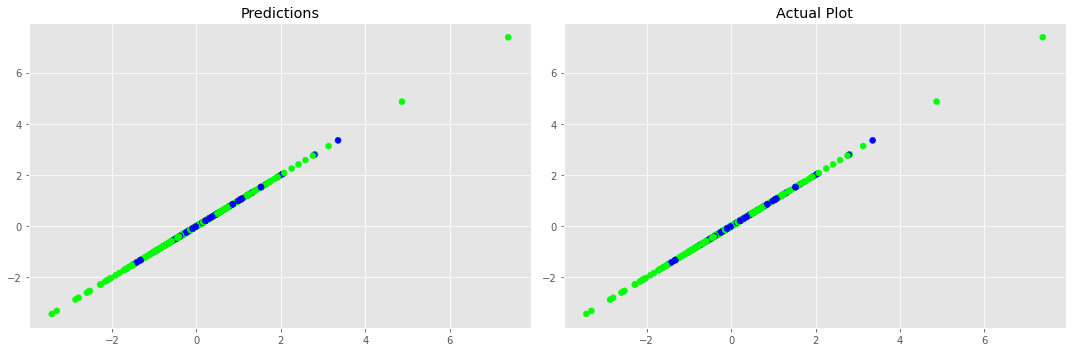

In [ ]:
plt.style.use('ggplot')
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
axes[0].scatter(df_xtrain.iloc[:,4],df_xtrain.iloc[:,4],c=y_train_pred,cmap='brg')
axes[1].scatter(df_xtrain.iloc[:,4],df_xtrain.iloc[:,4],c=y_train,cmap='brg')
axes[0].title.set_text("Predictions")
axes[1].title.set_text("Actual Plot")
fig.tight_layout()

# for 95 % varied pca data

In [ ]:
pca = PCA(.95)

In [ ]:
principalComponents95 = pca.fit_transform(scaled_data) 
principalDf95 = pd.DataFrame(data = principalComponents95)

In [ ]:
principalDf95.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,0.854614,1.969390,1.875328,-2.086394,-0.897176,-0.102411,2.159508,-0.673094,0.285484,-0.927800,-0.210439,-0.899122,-0.083104,-1.136037,0.071687,0.271791,0.569828
1,-0.298516,0.235050,-0.510201,1.391119,-0.685964,-1.123168,-0.661280,-2.758892,1.839229,-0.264500,1.648929,0.069608,0.287181,-0.065683,1.415329,-1.575260,-0.030766
2,3.078638,0.761497,-1.656571,-0.993384,-1.891366,2.045309,0.541368,0.335011,-0.256331,0.459911,0.260511,-0.567643,-0.215480,-0.658798,0.588662,-1.167086,-1.145764
3,0.453815,1.908074,-0.703945,2.302706,-2.495556,0.838159,2.064699,-0.347785,-0.632114,-0.055184,1.106446,-1.246500,-3.336296,1.141207,-1.556083,1.012140,1.208697
4,-1.979416,-0.640785,1.055068,0.400676,-0.996482,-0.663600,0.127239,-0.564725,0.143183,1.034252,0.701693,0.182970,0.139868,-0.471899,-0.013400,-0.623484,-0.503957


In [ ]:
Y = Y.astype(int)
Y = Y.reshape(-1)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(principalDf95,Y,test_size = 0.148)

In [ ]:
scaler = preprocessing.StandardScaler().fit(x_train)
x_train = scaler.transform(x_train)
scaler = preprocessing.StandardScaler().fit(x_test)
x_test = scaler.transform(x_test)

###Random search cv

In [ ]:
from sklearn.model_selection import RandomizedSearchCV# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 500, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 3,5]
# Minimum number of samples required at each leaf node
min_samples_leaf = [ 2, 3, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [ ]:
clf = RandomForestClassifier()
rf_rscv = RandomizedSearchCV(estimator=clf,param_distributions = random_grid,n_iter = 100,cv = 5)
rf_rscv.fit(x_train,y_train)

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [ ]:
rf_rscv.best_params_

{'bootstrap': True,
 'max_depth': 70,
 'max_features': 'auto',
 'min_samples_leaf': 3,
 'min_samples_split': 5,
 'n_estimators': 666}

###Grid search cv

In [ ]:
param_grid = {
    'bootstrap': [True],
    'max_depth': [50, 60,70,80],
    'max_features': ['auto','sqrt'],
    'min_samples_leaf': [2,3,4],
    'min_samples_split': [2,3,4],
    'n_estimators': [900,1000,1333,1400]
}
rf = RandomForestClassifier()# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)
grid_search.fit(x_train,y_train)

Fitting 3 folds for each of 288 candidates, totalling 864 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:  4.8min
[Parallel(n_jobs=-1)]: Done 361 tasks      | elapsed: 10.8min
[Parallel(n_jobs=-1)]: Done 644 tasks      | elapsed: 19.1min
[Parallel(n_jobs=-1)]: Done 864 out of 864 | elapsed: 25.5min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [ ]:
grid_search.best_params_

{'bootstrap': True,
 'max_depth': 50,
 'max_features': 'auto',
 'min_samples_leaf': 4,
 'min_samples_split': 3,
 'n_estimators': 1000}

In [ ]:
clf = RandomForestClassifier(n_estimators=1333,bootstrap=True,max_depth=80, max_features='sqrt', min_samples_split= 4, min_samples_leaf=3).fit(x_train,y_train)
clf.fit(x_train,y_train)
y_predicted = clf.predict(x_test)
y_train_pred = clf.predict(x_train)

pred_prob = clf.predict_proba(x_test)
print("Accuracy Test %0.2f" %(accuracy_score(y_test,y_predicted)*100))
print("Accuracy Train %0.2f" %(accuracy_score(y_train,y_train_pred)*100))
print("ROC-AUC Score %0.2f" %(roc_auc_score(y_test,pred_prob[:,1])*100))
print("Recall Score %0.2f" %(recall_score(y_test,y_predicted)*100))

Accuracy Test 83.91
Accuracy Train 97.20
ROC-AUC Score 82.46
Recall Score 94.03


In [ ]:
from xgboost import XGBRFClassifier
xgb = XGBRFClassifier()
xgb.fit(x_train,y_train)
y_predicted = xgb.predict(x_test)
y_train_pred = xgb.predict(x_train)

pred_prob = xgb.predict_proba(x_test)
print("Accuracy Test %0.2f" %(accuracy_score(y_test,y_predicted)*100))
print("Accuracy Train %0.2f" %(accuracy_score(y_train,y_train_pred)*100))
print("ROC-AUC Score %0.2f" %(roc_auc_score(y_test,pred_prob[:,1])*100))
print("Recall Score %0.2f" %(recall_score(y_test,y_predicted)*100))

Accuracy Test 78.16
Accuracy Train 84.60
ROC-AUC Score 80.67
Recall Score 89.55


In [ ]:
from lightgbm import LGBMClassifier
lgb = LGBMClassifier()
lgb.fit(x_train,y_train)
y_predicted = lgb.predict(x_test)
y_train_pred = lgb.predict(x_train)

pred_prob = xgb.predict_proba(x_test)
print("Accuracy Test %0.2f" %(accuracy_score(y_test,y_predicted)*100))
print("Accuracy Train %0.2f" %(accuracy_score(y_train,y_train_pred)*100))
print("ROC-AUC Score %0.2f" %(roc_auc_score(y_test,pred_prob[:,1])*100))
print("Recall Score %0.2f" %(recall_score(y_test,y_predicted)*100))

Accuracy Test 80.46
Accuracy Train 100.00
ROC-AUC Score 80.67
Recall Score 88.06


In [ ]:
from catboost import CatBoostClassifier
cgb = CatBoostClassifier(iterations=10000)
cgb.fit(x_train,y_train)
y_predicted = cgb.predict(x_test)
y_train_pred = cgb.predict(x_train)

In [ ]:
pred_prob = cgb.predict_proba(x_test)
print("Accuracy Test %0.2f" %(accuracy_score(y_test,y_predicted)*100))
print("Accuracy Train %0.2f" %(accuracy_score(y_train,y_train_pred)*100))
print("ROC-AUC Score %0.2f" %(roc_auc_score(y_test,pred_prob[:,1])*100))
print("Recall Score %0.2f" %(recall_score(y_test,y_predicted)*100))

Accuracy Test 82.76
Accuracy Train 100.00
ROC-AUC Score 82.24
Recall Score 92.54


In [ ]:
df_xtrain = pd.DataFrame(x_train)
df_xtrain.shape

(500, 17)

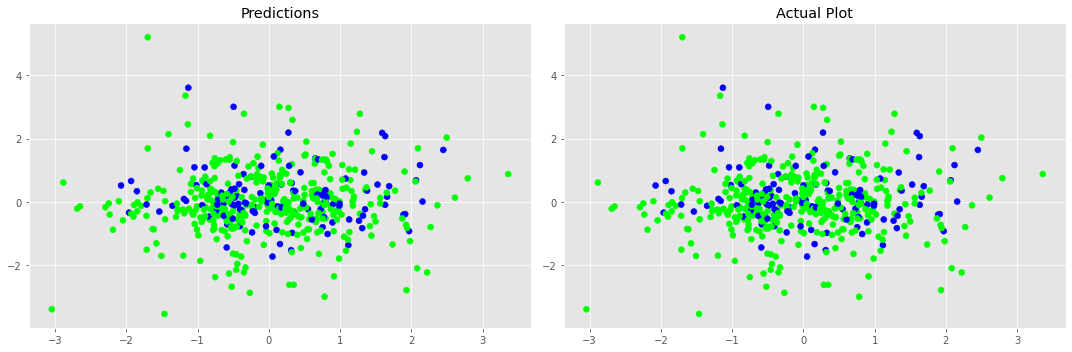

In [ ]:
plt.style.use('ggplot')
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
axes[0].scatter(df_xtrain.iloc[:,16],df_xtrain.iloc[:,4],c=y_train_pred,cmap='brg')
axes[1].scatter(df_xtrain.iloc[:,16],df_xtrain.iloc[:,4],c=y_train,cmap='brg')
axes[0].title.set_text("Predictions")
axes[1].title.set_text("Actual Plot")
fig.tight_layout()

#For all data PCA

In [ ]:
pca = PCA(n_components=22) 

In [ ]:
principalComponents100 = pca.fit_transform(scaled_data) 
principalDf100 = pd.DataFrame(data = principalComponents100)

In [ ]:
principalDf100.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21
0,0.854614,1.969390,1.875328,-2.086394,-0.897176,-0.102411,2.159508,-0.673094,0.285484,-0.927800,-0.210439,-0.899122,-0.083104,-1.136037,0.071687,0.271791,0.569828,-0.218647,-0.372470,-0.202201,1.850512e-14,-2.162372e-18
1,-0.298516,0.235050,-0.510201,1.391119,-0.685964,-1.123168,-0.661280,-2.758892,1.839229,-0.264500,1.648929,0.069608,0.287181,-0.065683,1.415329,-1.575260,-0.030766,0.562229,-0.695081,-0.057049,-1.270889e-15,-1.135290e-18
2,3.078638,0.761497,-1.656571,-0.993384,-1.891366,2.045309,0.541368,0.335011,-0.256331,0.459911,0.260511,-0.567643,-0.215480,-0.658798,0.588662,-1.167086,-1.145764,1.531393,0.318916,-0.300409,-1.649183e-14,-1.683999e-18
3,0.453815,1.908074,-0.703945,2.302706,-2.495556,0.838159,2.064699,-0.347785,-0.632114,-0.055184,1.106446,-1.246500,-3.336296,1.141207,-1.556083,1.012140,1.208697,-0.320018,0.164225,-0.346291,-7.084008e-15,-1.895752e-18
4,-1.979416,-0.640785,1.055068,0.400676,-0.996482,-0.663600,0.127239,-0.564725,0.143183,1.034252,0.701693,0.182970,0.139868,-0.471899,-0.013400,-0.623484,-0.503957,0.391240,-0.215752,-0.111108,3.240374e-15,-3.076069e-18


In [ ]:
Y = Y.astype(int)
Y = Y.reshape(-1)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size = 0.148)

In [ ]:
scaler = preprocessing.StandardScaler().fit(x_train)
x_train = scaler.transform(x_train)
scaler = preprocessing.StandardScaler().fit(x_test)
x_test = scaler.transform(x_test)

###RandomizedSearchCV

In [ ]:
from sklearn.model_selection import RandomizedSearchCV# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 500, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 3,5]
# Minimum number of samples required at each leaf node
min_samples_leaf = [ 2, 3, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [ ]:
clf = RandomForestClassifier()
rf_rscv = RandomizedSearchCV(estimator=clf,param_distributions = random_grid,n_iter = 100,cv = 5)
rf_rscv.fit(x_train,y_train)

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [ ]:
rf_rscv.best_params_

{'bootstrap': True,
 'max_depth': 100,
 'max_features': 'auto',
 'min_samples_leaf': 4,
 'min_samples_split': 2,
 'n_estimators': 1333}

###Grid search cv

In [ ]:
from sklearn.model_selection import GridSearchCV# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [50, 60,70,80],
    'max_features': ['auto','sqrt'],
    'min_samples_leaf': [2,3,4],
    'min_samples_split': [2,3,4],
    'n_estimators': [900,1000,1333,1400]
}
rf = RandomForestClassifier()# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)
grid_search.fit(x_train,y_train)

Fitting 3 folds for each of 288 candidates, totalling 864 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   59.7s
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:  4.1min
[Parallel(n_jobs=-1)]: Done 361 tasks      | elapsed:  9.4min
[Parallel(n_jobs=-1)]: Done 644 tasks      | elapsed: 16.9min
[Parallel(n_jobs=-1)]: Done 864 out of 864 | elapsed: 22.8min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [ ]:
grid_search.best_params_

{'bootstrap': True,
 'max_depth': 70,
 'max_features': 'sqrt',
 'min_samples_leaf': 4,
 'min_samples_split': 3,
 'n_estimators': 1000}

In [ ]:
clf = RandomForestClassifier(n_estimators=1333,bootstrap=True,max_depth=80, max_features='sqrt', min_samples_split= 4, min_samples_leaf=3).fit(x_train,y_train)
clf.fit(x_train,y_train)
y_predicted = clf.predict(x_test)
y_train_pred = clf.predict(x_train)

pred_prob = clf.predict_proba(x_test)
print("Accuracy Test %0.2f" %(accuracy_score(y_test,y_predicted)*100))
print("Accuracy Train %0.2f" %(accuracy_score(y_train,y_train_pred)*100))
print("ROC-AUC Score %0.2f" %(roc_auc_score(y_test,pred_prob[:,1])*100))
print("Recall Score %0.2f" %(recall_score(y_test,y_predicted)*100))

Accuracy Test 77.01
Accuracy Train 94.80
ROC-AUC Score 86.89
Recall Score 96.72


In [ ]:
from xgboost import XGBRFClassifier
xgb = XGBRFClassifier()
xgb.fit(x_train,y_train)
y_predicted = xgb.predict(x_test)
y_train_pred = xgb.predict(x_train)

pred_prob = xgb.predict_proba(x_test)
print("Accuracy Test %0.2f" %(accuracy_score(y_test,y_predicted)*100))
print("Accuracy Train %0.2f" %(accuracy_score(y_train,y_train_pred)*100))
print("ROC-AUC Score %0.2f" %(roc_auc_score(y_test,pred_prob[:,1])*100))
print("Recall Score %0.2f" %(recall_score(y_test,y_predicted)*100))

Accuracy Test 81.61
Accuracy Train 84.40
ROC-AUC Score 85.40
Recall Score 95.08


In [ ]:
from lightgbm import LGBMClassifier
lgb = LGBMClassifier()
lgb.fit(x_train,y_train)
y_predicted = lgb.predict(x_test)
y_train_pred = lgb.predict(x_train)

pred_prob = xgb.predict_proba(x_test)
print("Accuracy Test %0.2f" %(accuracy_score(y_test,y_predicted)*100))
print("Accuracy Train %0.2f" %(accuracy_score(y_train,y_train_pred)*100))
print("ROC-AUC Score %0.2f" %(roc_auc_score(y_test,pred_prob[:,1])*100))
print("Recall Score %0.2f" %(recall_score(y_test,y_predicted)*100))


Accuracy Test 79.31
Accuracy Train 100.00
ROC-AUC Score 85.40
Recall Score 91.80


In [ ]:
from catboost import CatBoostClassifier
cgb = CatBoostClassifier(iterations=10000)
cgb.fit(x_train,y_train)
y_predicted = cgb.predict(x_test)
y_train_pred = cgb.predict(x_train)

Streaming output truncated to the last 5000 lines.
5000:	learn: 0.1951175	total: 12.6s	remaining: 12.6s
5001:	learn: 0.1950785	total: 12.6s	remaining: 12.6s
5002:	learn: 0.1950655	total: 12.6s	remaining: 12.6s
5003:	learn: 0.1950262	total: 12.6s	remaining: 12.6s
5004:	learn: 0.1950084	total: 12.6s	remaining: 12.6s
5005:	learn: 0.1949940	total: 12.6s	remaining: 12.6s
5006:	learn: 0.1949771	total: 12.6s	remaining: 12.6s
5007:	learn: 0.1949677	total: 12.6s	remaining: 12.6s
5008:	learn: 0.1949604	total: 12.6s	remaining: 12.6s
5009:	learn: 0.1949422	total: 12.6s	remaining: 12.6s
5010:	learn: 0.1949278	total: 12.6s	remaining: 12.6s
5011:	learn: 0.1948990	total: 12.6s	remaining: 12.6s
5012:	learn: 0.1948854	total: 12.6s	remaining: 12.6s
5013:	learn: 0.1948404	total: 12.6s	remaining: 12.6s
5014:	learn: 0.1948342	total: 12.6s	remaining: 12.6s
5015:	learn: 0.1948195	total: 12.6s	remaining: 12.5s
5016:	learn: 0.1948099	total: 12.6s	remaining: 12.5s
5017:	learn: 0.1947744	total: 12.6s	remaining: 1

In [ ]:
pred_prob = cgb.predict_proba(x_test)
print("Accuracy Test %0.2f" %(accuracy_score(y_test,y_predicted)*100))
print("Accuracy Train %0.2f" %(accuracy_score(y_train,y_train_pred)*100))
print("ROC-AUC Score %0.2f" %(roc_auc_score(y_test,pred_prob[:,1])*100))
print("Recall Score %0.2f" %(recall_score(y_test,y_predicted)*100))

Accuracy Test 81.61
Accuracy Train 98.80
ROC-AUC Score 89.60
Recall Score 93.44


In [ ]:
df_xtrain = pd.DataFrame(x_train)
df_xtrain.shape

(500, 22)

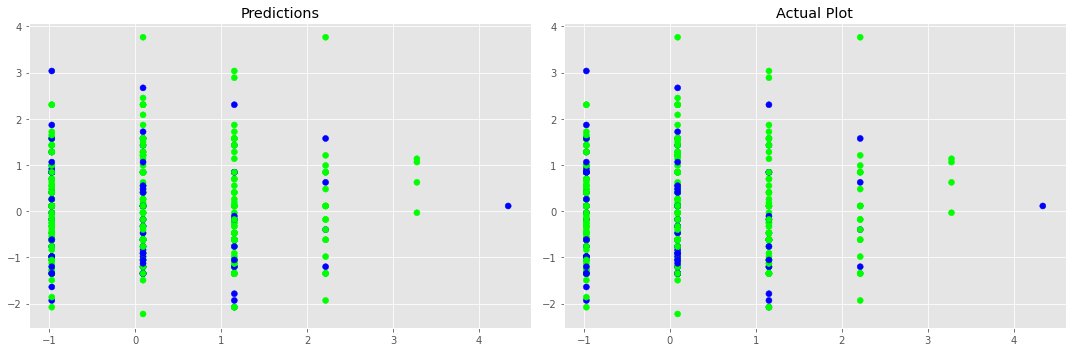

In [ ]:
plt.style.use('ggplot')
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
axes[0].scatter(df_xtrain.iloc[:,16],df_xtrain.iloc[:,4],c=y_train_pred,cmap='brg')
axes[1].scatter(df_xtrain.iloc[:,16],df_xtrain.iloc[:,4],c=y_train,cmap='brg')
axes[0].title.set_text("Predictions")
axes[1].title.set_text("Actual Plot")
fig.tight_layout()

# For 98% varied data --> 18 pca

In [ ]:
pca = PCA(n_components=.98)

In [ ]:
principalComponents98 = pca.fit_transform(scaled_data) 
principalDf98 = pd.DataFrame(data = principalComponents98)

In [ ]:
principalDf98.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,0.854614,1.969390,1.875328,-2.086394,-0.897176,-0.102411,2.159508,-0.673094,0.285484,-0.927800,-0.210439,-0.899122,-0.083104,-1.136037,0.071687,0.271791,0.569828,-0.218647
1,-0.298516,0.235050,-0.510201,1.391119,-0.685964,-1.123168,-0.661280,-2.758892,1.839229,-0.264500,1.648929,0.069608,0.287181,-0.065683,1.415329,-1.575260,-0.030766,0.562229
2,3.078638,0.761497,-1.656571,-0.993384,-1.891366,2.045309,0.541368,0.335011,-0.256331,0.459911,0.260511,-0.567643,-0.215480,-0.658798,0.588662,-1.167086,-1.145764,1.531393
3,0.453815,1.908074,-0.703945,2.302706,-2.495556,0.838159,2.064699,-0.347785,-0.632114,-0.055184,1.106446,-1.246500,-3.336296,1.141207,-1.556083,1.012140,1.208697,-0.320018
4,-1.979416,-0.640785,1.055068,0.400676,-0.996482,-0.663600,0.127239,-0.564725,0.143183,1.034252,0.701693,0.182970,0.139868,-0.471899,-0.013400,-0.623484,-0.503957,0.391240


In [ ]:
Y = Y.astype(int)
Y = Y.reshape(-1)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(principalDf98,Y,test_size = 0.148)

In [ ]:
scaler = preprocessing.StandardScaler().fit(x_train)
x_train = scaler.transform(x_train)
scaler = preprocessing.StandardScaler().fit(x_test)
x_test = scaler.transform(x_test)

###Randomized search cv

In [ ]:
from sklearn.model_selection import RandomizedSearchCV# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 500, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 3,5]
# Minimum number of samples required at each leaf node
min_samples_leaf = [ 2, 3, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [ ]:
clf = RandomForestClassifier()
rf_rscv = RandomizedSearchCV(estimator=clf,param_distributions = random_grid,n_iter = 100,cv = 5)
rf_rscv.fit(x_train,y_train)

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [ ]:
rf_rscv.best_params_

{'bootstrap': True,
 'max_depth': 110,
 'max_features': 'sqrt',
 'min_samples_leaf': 2,
 'min_samples_split': 5,
 'n_estimators': 1833}

### Grid search cv

In [ ]:
from sklearn.model_selection import GridSearchCV# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [50, 60,70,80],
    'max_features': ['auto','sqrt'],
    'min_samples_leaf': [2,3,4],
    'min_samples_split': [2,3,4],
    'n_estimators': [900,1000,1333,1400]
}
rf = RandomForestClassifier()# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)
grid_search.fit(x_train,y_train)

Fitting 3 folds for each of 288 candidates, totalling 864 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:  4.5min
[Parallel(n_jobs=-1)]: Done 361 tasks      | elapsed: 10.3min
[Parallel(n_jobs=-1)]: Done 644 tasks      | elapsed: 18.3min
[Parallel(n_jobs=-1)]: Done 864 out of 864 | elapsed: 24.7min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [ ]:
grid_search.best_params_

{'bootstrap': True,
 'max_depth': 80,
 'max_features': 'auto',
 'min_samples_leaf': 4,
 'min_samples_split': 2,
 'n_estimators': 900}

In [ ]:
clf = RandomForestClassifier(n_estimators=1333,bootstrap=True,max_depth=80, max_features='sqrt', min_samples_split= 4, min_samples_leaf=3).fit(x_train,y_train)
clf.fit(x_train,y_train)
y_predicted = clf.predict(x_test)
y_train_pred = clf.predict(x_train)

pred_prob = clf.predict_proba(x_test)
print("Accuracy Test %0.2f" %(accuracy_score(y_test,y_predicted)*100))
print("Accuracy Train %0.2f" %(accuracy_score(y_train,y_train_pred)*100))
print("ROC-AUC Score %0.2f" %(roc_auc_score(y_test,pred_prob[:,1])*100))
print("Recall Score %0.2f" %(recall_score(y_test,y_predicted)*100))

Accuracy Test 85.06
Accuracy Train 97.60
ROC-AUC Score 89.09
Recall Score 95.59


In [ ]:
from xgboost import XGBRFClassifier
xgb = XGBRFClassifier()
xgb.fit(x_train,y_train)
y_predicted = xgb.predict(x_test)
y_train_pred = xgb.predict(x_train)

pred_prob = xgb.predict_proba(x_test)
print("Accuracy Test %0.2f" %(accuracy_score(y_test,y_predicted)*100))
print("Accuracy Train %0.2f" %(accuracy_score(y_train,y_train_pred)*100))
print("ROC-AUC Score %0.2f" %(roc_auc_score(y_test,pred_prob[:,1])*100))
print("Recall Score %0.2f" %(recall_score(y_test,y_predicted)*100))

Accuracy Test 85.06
Accuracy Train 86.80
ROC-AUC Score 84.44
Recall Score 94.12


In [ ]:
from lightgbm import LGBMClassifier
lgb = LGBMClassifier()
lgb.fit(x_train,y_train)
y_predicted = lgb.predict(x_test)
y_train_pred = lgb.predict(x_train)

pred_prob = xgb.predict_proba(x_test)
print("Accuracy Test %0.2f" %(accuracy_score(y_test,y_predicted)*100))
print("Accuracy Train %0.2f" %(accuracy_score(y_train,y_train_pred)*100))
print("ROC-AUC Score %0.2f" %(roc_auc_score(y_test,pred_prob[:,1])*100))
print("Recall Score %0.2f" %(recall_score(y_test,y_predicted)*100))

Accuracy Test 82.76
Accuracy Train 100.00
ROC-AUC Score 84.44
Recall Score 92.65


In [ ]:
!pip install catboost

In [ ]:
from catboost import CatBoostClassifier
cgb = CatBoostClassifier(iterations=10000)
cgb.fit(x_train,y_train)
y_predicted = cgb.predict(x_test)
y_train_pred = cgb.predict(x_train)

Streaming output truncated to the last 5000 lines.
5000:	learn: 0.1706111	total: 26.2s	remaining: 26.2s
5001:	learn: 0.1705783	total: 26.2s	remaining: 26.2s
5002:	learn: 0.1705433	total: 26.2s	remaining: 26.2s
5003:	learn: 0.1705246	total: 26.2s	remaining: 26.2s
5004:	learn: 0.1705024	total: 26.2s	remaining: 26.2s
5005:	learn: 0.1704656	total: 26.2s	remaining: 26.2s
5006:	learn: 0.1704363	total: 26.2s	remaining: 26.2s
5007:	learn: 0.1704232	total: 26.2s	remaining: 26.1s
5008:	learn: 0.1704017	total: 26.2s	remaining: 26.1s
5009:	learn: 0.1703778	total: 26.2s	remaining: 26.1s
5010:	learn: 0.1703496	total: 26.2s	remaining: 26.1s
5011:	learn: 0.1703285	total: 26.3s	remaining: 26.1s
5012:	learn: 0.1702980	total: 26.3s	remaining: 26.1s
5013:	learn: 0.1702398	total: 26.3s	remaining: 26.1s
5014:	learn: 0.1702025	total: 26.3s	remaining: 26.1s
5015:	learn: 0.1701912	total: 26.3s	remaining: 26.1s
5016:	learn: 0.1701537	total: 26.3s	remaining: 26.1s
5017:	learn: 0.1701274	total: 26.3s	remaining: 2

In [ ]:
pred_prob = cgb.predict_proba(x_test)
print("Accuracy Test %0.2f" %(accuracy_score(y_test,y_predicted)*100))
print("Accuracy Train %0.2f" %(accuracy_score(y_train,y_train_pred)*100))
print("ROC-AUC Score %0.2f" %(roc_auc_score(y_test,pred_prob[:,1])*100))
print("Recall Score %0.2f" %(recall_score(y_test,y_predicted)*100))

Accuracy Test 85.06
Accuracy Train 100.00
ROC-AUC Score 86.92
Recall Score 94.12


In [ ]:
df_xtrain = pd.DataFrame(x_train)
df_xtrain.shape

(500, 18)

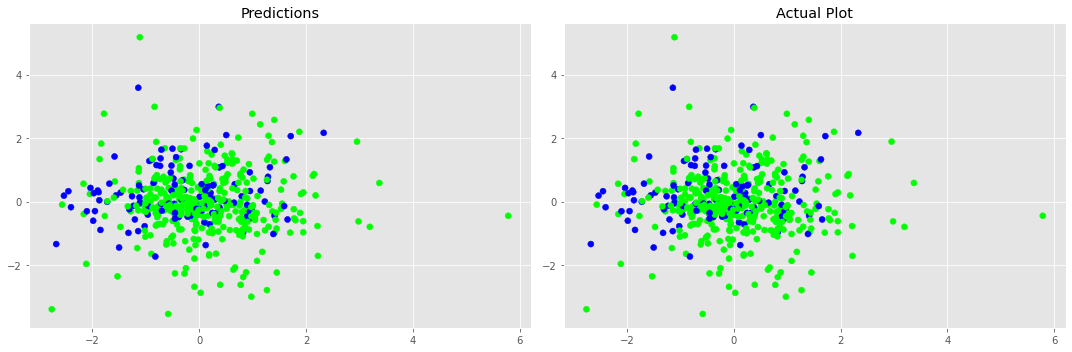

In [ ]:
plt.style.use('ggplot')
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
axes[0].scatter(df_xtrain.iloc[:,17],df_xtrain.iloc[:,4],c=y_train_pred,cmap='brg')
axes[1].scatter(df_xtrain.iloc[:,17],df_xtrain.iloc[:,4],c=y_train,cmap='brg')
axes[0].title.set_text("Predictions")
axes[1].title.set_text("Actual Plot")
fig.tight_layout()